In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/My Drive/HUMANA_MAYS/DC3.csv')

In [ ]:
df = pd.read_csv('/content/drive/My Drive/HUMANA_MAYS/RODC1.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48300 entries, 0 to 48299
Columns: 709 entries, id to cms_orig_reas_entitle_cd_U
dtypes: float64(625), int64(84)
memory usage: 261.3 MB


In [3]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'hi_flag']
y = df[['hi_flag']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

0    11535
1      540
Name: hi_flag, dtype: int64

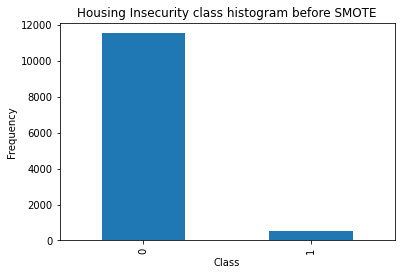

In [9]:

import matplotlib.pyplot as plt
pd.value_counts(y_test['hi_flag']).plot.bar()
plt.title('Housing Insecurity class histogram before SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
y_test['hi_flag'].value_counts()

In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(0.08)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.08 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


0    34647
1     2771
Name: hi_flag, dtype: int64

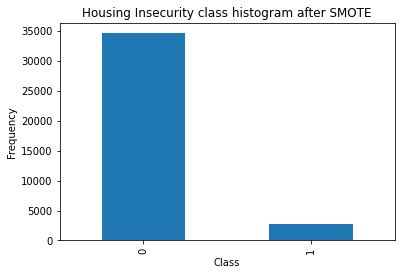

In [13]:

import matplotlib.pyplot as plt
pd.value_counts(y_sm['hi_flag']).plot.bar()
plt.title('Housing Insecurity class histogram after SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
y_sm['hi_flag'].value_counts()

In [ ]:
df1=df[['cons_homstat_Y','cms_orig_reas_entitle_cd_0.0','cms_low_income_ind',
                  'total_physician_office_allowed_pmpm_cost','med_physician_office_ds_clm','est_age',
                 'cons_mobplus_U','atlas_totalocchu']]

In [ ]:
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'features': X_train.columns,
                              'importance': feature_importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
imp_col1=importance_df[importance_df['importance']==0]

print(imp_col1.features)

In [ ]:
removed_df=pd.read_csv('/content/drive/My Drive/HUMANA_MAYS/Feature_Imp1.csv',header=None)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
from xgboost import XGBRegressor
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
model = XGBRegressor(learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, min_samples_split=5, n_iter_no_change=10, gamma=0,scale_pos_weight=10)
#smote = SMOTE(0.08)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

model.fit(X_sm, y_sm)

rmse = (roc_auc_score(y_test, model.predict(X_test)))
rmse

[20:29:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.754177302573488

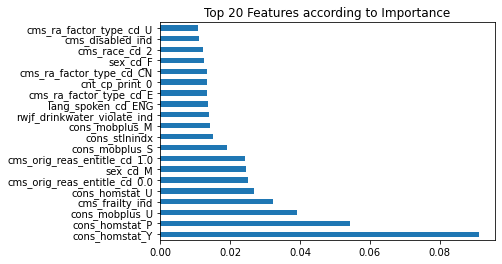

In [23]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances=feat_importances.sort_values(ascending=False)
plt.title('Top 20 Features according to Importance')
feat_importances.nlargest(20).sort_values(ascending=False).plot(kind='barh')

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE
model = XGBRegressor(learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, min_samples_split=5, scoring='roc_auc', n_iter_no_change=10, gamma=0,scale_pos_weight=21)
#model.fit(X_train, y_train)
#smote = SMOTE(0.08)
#X_sm, y_sm = smote.fit_resample(X_train, y_train)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
model.fit(X_sm, y_sm)

auc_score1 = roc_auc_score(y_test, model.predict(X_test))
auc_score1


[05:13:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7530621779126331

[03:42:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.05, min_child_weight=5, min_samples_split=5,
             n_iter_no_change=10, scale_pos_weight=10, scoring='roc_auc')

In [ ]:
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model.predict(X_test))
auc_score1

0.7555727335484596

In [ ]:
scores

array([0.84608957, 0.8660754 , 0.8502998 , 0.83615734, 0.81886425,
       0.83336928, 0.86515594, 0.82297361, 0.8513269 , 0.84638697,
       0.84897766, 0.82996963, 0.84438818, 0.85141774, 0.83567495,
       0.84209188, 0.84805976, 0.83524785, 0.83824339, 0.87011426,
       0.8312053 , 0.83909961, 0.85571965, 0.87563203, 0.83849011,
       0.8162408 , 0.85508411, 0.83228625, 0.84625357, 0.84524683])

In [ ]:
from statistics import mean
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.84387


In [ ]:
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'features': X_train.columns,
                              'importance': feature_importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
imp_col=importance_df[importance_df['importance']!=0]
imp_col.columns = ['Feature', 'Importance']
imp_col.to_csv('/content/drive/My Drive/HUMANA_MAYS/FeatureImportance_1013.csv', index=False)
print(imp_col)

                                        Feature  Importance
698                              cons_homstat_Y    0.110566
684                              cons_mobplus_U    0.049429
694                              cons_homstat_P    0.035886
697                              cons_homstat_U    0.029685
555                             cms_frailty_ind    0.029179
663                                    sex_cd_M    0.028326
61                             cms_disabled_ind    0.027201
703                cms_orig_reas_entitle_cd_0.0    0.024770
683                              cons_mobplus_S    0.021811
681                              cons_mobplus_M    0.019978
676                               cms_race_cd_2    0.016925
704                cms_orig_reas_entitle_cd_1.0    0.016424
691                     cms_ra_factor_type_cd_E    0.013921
675                               cms_race_cd_1    0.013407
662                                    sex_cd_F    0.013385
688                    cms_ra_factor_typ

In [ ]:
import pandas as pd
df1=pd.read_csv("/content/drive/My Drive/HUMANA_MAYS/DC_FeatureImp1.csv") 

In [ ]:
df1=df[imp_col.features]
df1.info()

NameError: ignored

In [ ]:
df2=df1.drop('id',axis=1)

In [ ]:
from sklearn import preprocessing
d = preprocessing.normalize(df2)
scaled_df = pd.DataFrame(d, columns=df2.columns)
scaled_df.head()

,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,cmsd2_mus_arthropath_pmpm_ct,rx_hum_28_pmpm_ct,rwjf_homicides_rate,...,cons_homstat_Y,lang_spoken_cd_*,lang_spoken_cd_ENG,lang_spoken_cd_SPA,lang_spoken_cd_U,cms_orig_reas_entitle_cd_0.0,cms_orig_reas_entitle_cd_1.0,cms_orig_reas_entitle_cd_2.0,cms_orig_reas_entitle_cd_3.0,cms_orig_reas_entitle_cd_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000012,...,0.000000,0.0,0.000002,0.0,0.000000,0.000002,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000013,...,0.000003,0.0,0.000003,0.0,0.000000,0.000003,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000017,...,0.000000,0.0,0.000000,0.0,0.000001,0.000001,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000015,...,0.000000,0.0,0.000000,0.0,0.000002,0.000002,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000012,...,0.000000,0.0,0.000000,0.0,0.000002,0.000000,0.000002,0.0,0.0,0.0


In [ ]:
df.to_csv("/content/drive/My Drive/HUMANA_MAYS/DC_FeatureImp1.csv",index=False)  


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
params = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              'num_class': [10]
              }

xgbclf = xgb.XGBRegressor(objective="multi:softmax", tree_method='hist')
clf = RandomizedSearchCV(estimator=xgbclf,
                             param_distributions=params,
                             scoring='roc_auc',
                             n_iter=25,
                             n_jobs=4,
                             verbose=1)

clf.fit(X_sm, y_sm)

best_combination = clf.best_params_


if __name__ == '__main__':
 best_params = random_search_tuning()

print("Best hyperparameter combination: ", best_params)

NameError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights,learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, min_samples_split=5, n_iter_no_change=10, gamma=0)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48300 entries, 0 to 48299
Columns: 709 entries, id to cms_orig_reas_entitle_cd_U
dtypes: float64(625), int64(84)
memory usage: 261.3 MB


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.9 MB/s 


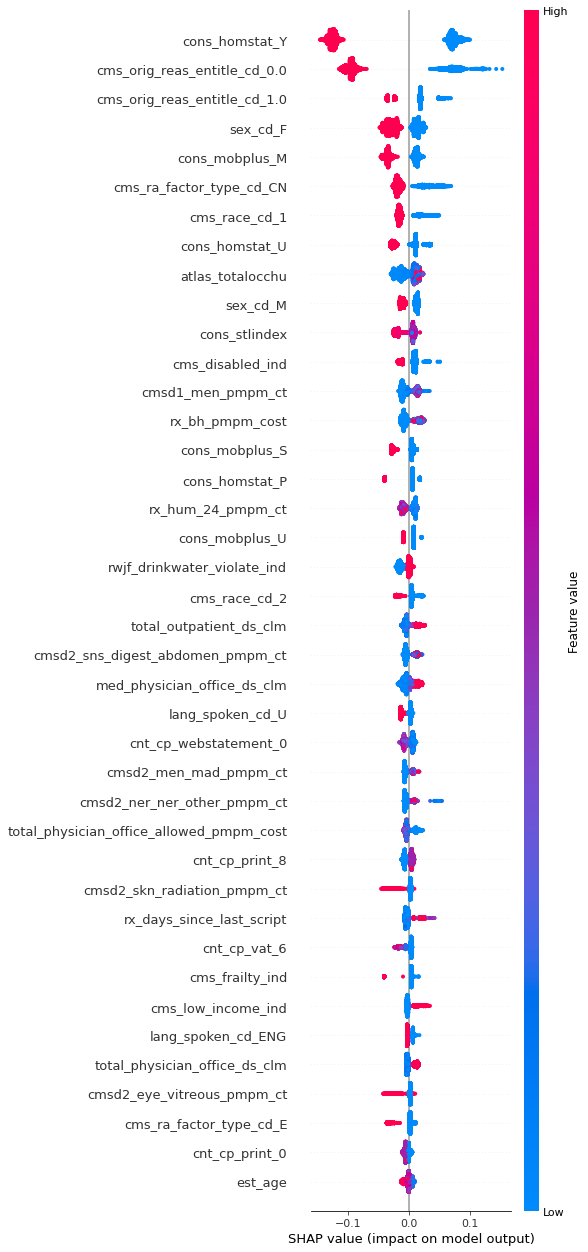

In [ ]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
# visualize the first prediction's explanation
#shap.plots.waterfall(shap_values[0])
shap.summary_plot(shap_values, X_test, max_display= 40)

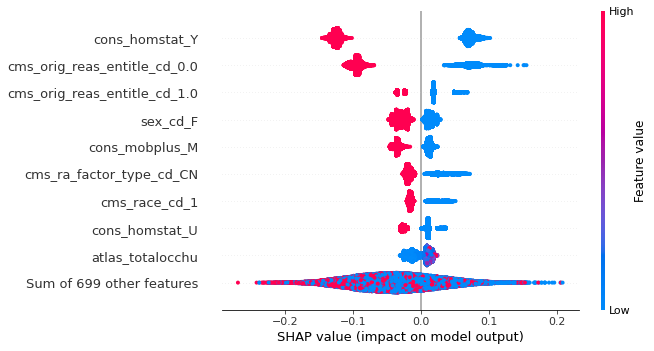

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
df_f = pd.read_csv('/content/drive/My Drive/HUMANA_MAYS/FDC1.csv')

In [ ]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12220 entries, 0 to 12219
Columns: 918 entries, id to cms_orig_reas_entitle_cd_U
dtypes: float64(814), int64(104)
memory usage: 85.6 MB


In [ ]:
common_cols = list(set(df.columns).intersection(df_f.columns))

In [ ]:
df3 = df_f[common_cols]

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12220 entries, 0 to 12219
Columns: 708 entries, rx_hum_90_pmpm_cost to rx_hum_52_pmpm_ct
dtypes: float64(623), int64(85)
memory usage: 66.0 MB


In [ ]:
df_f

,id,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,rev_pm_capd_pmpm_cd_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,cmsd2_mus_arthropath_pmpm_ct,...,cons_homstat_Y,lang_spoken_cd_*,lang_spoken_cd_ENG,lang_spoken_cd_SPA,lang_spoken_cd_U,cms_orig_reas_entitle_cd_0.0,cms_orig_reas_entitle_cd_1.0,cms_orig_reas_entitle_cd_2.0,cms_orig_reas_entitle_cd_3.0,cms_orig_reas_entitle_cd_U
0,100093066.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,1,0,0,0
1,100313000.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0
2,100330875.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0
3,100346385.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,1,0,0,0,1,1,0,0,0,0
4,100443164.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12215,999896529.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,1,0,0,0
12216,999899065.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,1,0,0,0
12217,999946210.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,1,0,0,0,1,1,0,0,0,0
12218,999984658.0,0.0,0.0,0.0,0.0,0.16,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
cols_when_model_builds = model.get_booster().feature_names

In [ ]:
df3 = df3[cols_when_model_builds]

In [ ]:
y_pred=model.predict(df3)

In [ ]:
import numpy as np
np.sort(y_pred)
c=0
for i in y_pred:
  if(i>0.5):
    c=c+1
c

1412

In [ ]:
np.sort(y_pred)

array([-0.04617172, -0.03466594, -0.03297806, ...,  0.7534298 ,
        0.7754456 ,  0.80312335], dtype=float32)

In [ ]:
df3['prob']=y_pred

In [ ]:
df3=pd.read_csv('/content/drive/My Drive/HUMANA_MAYS/FDC1.csv')

In [ ]:
df3[['id','prob']].to_csv('/content/drive/My Drive/HUMANA_MAYS/RESULTSSSSSSSSSS.csv')

In [ ]:
df3.head()

,id,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,cmsd2_mus_arthropath_pmpm_ct,rx_hum_28_pmpm_ct,rwjf_homicides_rate,rev_pm_restrp_pmpm_cd_ct,bh_cdsb_pmpm_ct,rwjf_premature_death_rate,rx_overall_pmpm_cost,rx_overall_pmpm_ct,cci_mlg_pmpm_ct,bh_ncal_pmpm_ct,cnt_cp_print_0,rev_pm_occtrp_pmpm_cd_ct,cnt_cp_webstatement_5,rwjf_poor_men_hlth_days,rx_maint_pmpm_ct,rx_hum_11_pmpm_cost,rx_hum_09_pmpm_ct,rx_hum_10_pmpm_ct,cmsd2_ano_mus_pmpm_ct,cmsd2_vco_circumstances_pmpm_ct,rx_hum_81_pmpm_cost,cmsd1_eye_pmpm_ct,rx_hum_61_pmpm_ct,cnt_cp_emails_9,cmsd2_ext_other_land_transport_pmpm_ct,rev_pm_blood_pmpm_cd_ct,rev_pm_xdiag_pmpm_cd_ct,total_outpatient_visit_ct_pmpm,cci_mst_pmpm_ct,cmsd2_inj_thorax_pmpm_ct,cmsd2_sns_imaging_pmpm_ct,dcsi_score,rx_hum_22_pmpm_cost,rx_hum_50_pmpm_cost,cmsd2_inf_bact_other_pmpm_ct,bh_ambulance_visit_ct_pmpm,cnt_cp_webstatement_11,cmsd2_cir_other_cir_pmpm_ct,total_outpatient_allowed_pmpm_cost,cnt_cp_print_1,rev_pm_hemodia_pmpm_cd_ct,cmsd2_men_physical_pmpm_ct,cmsd2_inf_infectious_pmpm_ct,cnt_cp_webstatement_0,cmsd2_sns_men_pmpm_ct,cci_mi_pmpm_ct,rx_hum_04_pmpm_cost,rx_hum_53_pmpm_ct,cmsd2_dig_noninf_enteritis/colitis_pmpm_ct,cmsd2_can_unc_neo/plycyth/myelo_pmpm_ct,cmsd2_mus_osteoarth_pmpm_ct,credit_bal_nonmtgcredit_60dpd,cmsd2_can_unspec_neo_pmpm_ct,cms_disabled_ind,cmsd2_can_mal_end_pmpm_ct,bh_otic_pmpm_ct,cmsd2_res_res_postop_pmpm_ct,cnt_cp_emails_0,cmsd2_inj_lower_pmpm_ct,rx_hum_12_pmpm_ct,cmsd2_eye_conjuctiva_pmpm_ct,rx_hum_30_pmpm_ct,cmsd2_mus_mus_postop_pmpm_ct,rev_pm_pystrp_pmpm_cd_ct,rx_hum_63_pmpm_cost,cnt_cp_webstatement_2,cmsd1_unc_pmpm_ct,cnt_cp_print_7,cnt_cp_vat_0,cons_lwcm10,rx_hum_52_pmpm_cost,cmsd1_ext_pmpm_ct,cmsd2_mus_ctd_pmpm_ct,rx_hum_15_pmpm_ct,med_er_ds_clm,cmsd1_cir_pmpm_ct,cons_hxmioc,cmsd2_sns_skn_pmpm_ct,cmsd2_inj_burns_ext_pmpm_ct,cmsd2_sns_digest_abdomen_pmpm_ct,rx_branded_pmpm_cost,med_ip_acute_ds_clm,rev_pm_oclin_pmpm_cd_ct,rev_pm_radtrp_pmpm_cd_ct,rev_pm_room_pmpm_cd_ct,cmsd2_can_mal_urinary_pmpm_ct,cmsd2_end_dm_pmpm_ct,cmsd2_eye_eye_other_pmpm_ct,rev_pm_audio_pmpm_cd_ct,credit_hh_autobank,cmsd2_mus_chondropath_pmpm_ct,cnt_cp_emails_5,atlas_naturalchangerate1016,bh_apan_pmpm_ct,rev_pm_ivtrp_pmpm_cd_ct,rx_specialty_ntwk_pmpm_ct,total_ip_snf_ds_clm,cmsd2_inf_infestation_pmpm_ct,cmsd2_inj_shoulder_pmpm_ct,cmsd2_men_psychotic_pmpm_ct,cmsd2_ner_paralytic_pmpm_ct,cmsd2_vco_exam_pmpm_ct,rx_hum_41_pmpm_ct,rx_hum_57_pmpm_ct,bh_otsd_pmpm_ct,total_ip_rehab_allowed_pmpm_cost,cmsd2_cir_other_heart_disease_pmpm_ct,cmsd2_men_men_child_pmpm_ct,rev_pm_ambul_pmpm_cd_ct,rx_hum_85_pmpm_ct,cmsd2_skn_derm/eczema_pmpm_ct,rx_hum_91_pmpm_ct,cmsd2_ext_overexertion_pmpm_ct,rx_nonotc_pmpm_cost,rx_hum_16_pmpm_cost,rx_hum_75_pmpm_ct,rx_nonspecialty_pmpm_ct,rx_otc_pmpm_cost,cmsd2_cir_ch_rheum_hrt_pmpm_ct,cmsd2_mus_osteopath_pmpm_ct,rev_pm_asc_pmpm_cd_ct,cmsd2_bld_hemorrhagic_pmpm_ct,cmsd2_gus_genital_postop_pmpm_ct,cmsd2_can_mal_fem_genital_pmpm_ct,rx_hum_24_pmpm_cost,total_ambulance_ds_clm,rx_hum_89_pmpm_cost,cmsd2_res_res_up_pmpm_ct,rev_pm_hh_pmpm_cd_ct,total_ip_snf_admit_ct_pmpm,rev_pm_oroom_pmpm_cd_ct,total_ambulance_visit_ct_pmpm,med_ip_rehab_ds_clm,total_er_ds_clm,credit_num_1stmtg_collections,cmsd2_bld_bld_other_pmpm_ct,rx_hum_34_pmpm_ct,rx_hum_49_pmpm_ct,cmsd1_ear_pmpm_ct,bh_ambulance_allowed_pmpm_cost,rx_hum_09_pmpm_cost,rwjf_dentists_ratio,cmsd2_inj_neck_pmpm_ct,rx_hum_58_pmpm_ct,rev_pm_phar_pmpm_cd_ct,rev_pm_recrm_pmpm_cd_ct,cmsd2_ner_ner_peripheral_pmpm_ct,rx_hum_76_pmpm_cost,rev_pm_labpth_pmpm_cd_ct,cons_hxmboh,rx_hum_89_pmpm_ct,bh_suid_pmpm_ct,rx_hum_17_pmpm_cost,cmsd2_eye_glaucoma_pmpm_ct,total_ip_acute_admit_ct_pmpm,bh_otot_pmpm_ct,cci_cvd_pmpm_ct,total_allowed_pmpm_cost,rx_nonmail_pmpm_ct,med_ip_snf_ds_clm,est_age,rx_hum_68_pmpm_cost,rx_hum_16_pmpm_ct,cmsd2_mus_synovium/tendon_pmpm_ct,cnt_cp_webstatement_1,rev_pm_excl_pmpm_cd_ct,cnt_cp_webstatement_pmpm_ct,rev_pm_spcha_pmp

In [ ]:
holdout = pd.read_csv('/content/drive/My Drive/HUMANA_MAYS/FDC1.csv')
holdout_personid = holdout['id']

Holdout_Submission = pd.DataFrame()
Holdout_Submission['ID'] = holdout_personid
Holdout_Submission['PredProb'] = model.predict(df3)
Holdout_Submission = Holdout_Submission.sort_values(by = ['PredProb'],ascending = False)
Holdout_index = Holdout_Submission.index
Rank = list(range(0,len(Holdout_index)))
Holdout_Submission["Rank"] = np.asarray(Rank) + 1


Holdout_Submission.columns = ['ID', 'Predicted Value', 'Individual Rank']
Holdout_Submission.to_csv('/content/drive/My Drive/HUMANA_MAYS/Holdout Submission File.csv', index=False) 
Holdout_Submission

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sklearn.model_selection import train_test_split

fraud_df = df.loc[df['hi_flag'] == 1]
non_fraud_df = df.loc[df['hi_flag'] == 0][:2118]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
import lightgbm as lgb
params['learning_rate']=0.02
params['num_leaves']: 1000
params['is_unbalance'] = False
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=30
params['min_child_samples']: 78
params['lambda_l1']: 4.5710796637344755
params['lambda_l2']: 2.9721923015218796
params['num_leaves']: 31
params['feature_fraction']: 0.7822395507451473
params['bagging_fraction']: 0.5614815105648284
params['bagging_freq']: 6
model = lgb.LGBMClassifier(params)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[20]	training's binary_logloss: 0.178127	training's binary_logloss: 0.178127	valid_0's binary_logloss: 0.182056	valid_0's binary_logloss: 0.182056
[40]	training's binary_logloss: 0.17721	training's binary_logloss: 0.17721	valid_0's binary_logloss: 0.181467	valid_0's binary_logloss: 0.181467
[60]	training's binary_logloss: 0.176349	training's binary_logloss: 0.176349	valid_0's binary_logloss: 0.18093	valid_0's binary_logloss: 0.18093
[80]	training's binary_logloss: 0.175515	training's binary_logloss: 0.175515	valid_0's binary_logloss: 0.18042	valid_0's binary_logloss: 0.18042
[100]	training's binary_logloss: 0.174717	training's binary_logloss: 0.174717	valid_0's binary_logloss: 0.17993	valid_0's binary_logloss: 0.17993


LGBMClassifier(learning_rate=0.001, max_depth=-5, random_state=42)

In [ ]:
from sklearn.metrics import roc_auc_score
rmse = (roc_auc_score(y_test, model.predict(X_test)))

In [ ]:
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model.predict(X_test))
auc_score1

0.5